<a href="https://colab.research.google.com/github/LeTrungDunggg/LeTrungDunggg/blob/main/BAi4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
#doc dia chi hinh anh
import os
#xu ly ve hinh anh
from PIL import Image

In [ ]:
#khai bien doc dia chi
train_data ='drive/MyDrive/AI/Bai4/train'
test_data='drive/MyDrive/AI/Bai4/test'

In [ ]:
listdata_train=[]
listdata_validation=[]
listdata_test=[]
dict={'toan':[2],'dat':[1],'dung':[0]}

In [ ]:
def Getdata(dirdata,lstdata):
#doc hinh anh trong tap du lieu
  for whatever in os.listdir(dirdata):
      whatever_path = os.path.join(dirdata,whatever)
      lst_filename_path=[]
      for filename in os.listdir(whatever_path):
        filename_path=os.path.join(whatever_path,filename)
        label=filename_path.split('/')[5]
        img = np.array(Image.open(filename_path))
        lst_filename_path.append((img,dict[label]))
      lstdata.extend(lst_filename_path)
  for i in range(3):
      np.random.shuffle(lstdata)
  return lstdata

In [ ]:
listdata_train=Getdata(train_data,listdata_train)
listdata_test=Getdata(test_data,listdata_test)

In [ ]:
x_train=np.array([x[0] for _ ,x in enumerate(listdata_train)])
y_train=np.array([y[1] for _ ,y in enumerate(listdata_train)])
y_train.shape

(123, 1)

In [ ]:
x_test=np.array([x[0] for _ ,x in enumerate(listdata_test)])
y_test=np.array([y[1] for _ ,y in enumerate(listdata_test)])
x_test.shape

(42, 150, 150, 3)

In [ ]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from keras.backend import categorical_crossentropy

In [ ]:
yname=y_train.flatten()

In [ ]:
class_names=['dung','dat','toan']
x_pre=x_test
y_pre=y_test
y_pre

array([[0],
       [1],
       [0],
       [1],
       [2],
       [1],
       [1],
       [0],
       [2],
       [0],
       [2],
       [1],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [0],
       [2],
       [2],
       [1],
       [2],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [2],
       [2],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [2],
       [0],
       [2]])

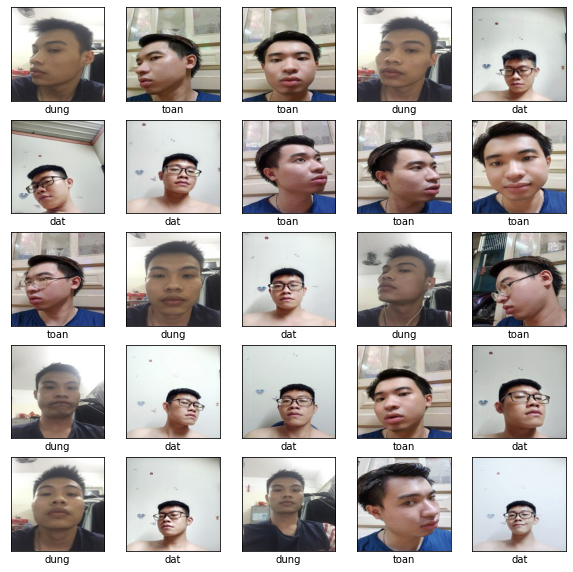

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap='binary')
    plt.xlabel(class_names[yname[i]])
plt.show()

In [ ]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#import thư viện
import numpy as np #thư viện xử lý ma trận
from keras.utils import np_utils # thư viện xử lý chuyển class
from keras.datasets import cifar10 # gọi tập dataset động vật, máy bay 
from keras.models import Sequential # hàm chạy mô hình
from keras.layers import Dense, Dropout,Flatten # tạo mạng nơ ron
from tensorflow.keras.optimizers import RMSprop,SGD 
import matplotlib.pyplot as plt  # thư viện dùng để vẽ
from keras.backend import dropout
from keras.callbacks import EarlyStopping
from keras.layers import Conv2D,MaxPooling2D

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
y_train=np_utils.to_categorical(y_train,3)
y_test=np_utils.to_categorical(y_test,3)

model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) # Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))) # Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

In [ ]:
opt=SGD(lr=0.01,momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(x_train,y_train, epochs = 1000, batch_size = 64, validation_data = (x_test,y_test), verbose = 1)

Epoch 1/1000
2/2 [==============================] - 1s 366ms/step - loss: 6.3798 - accuracy: 0.3984 - val_loss: 8.0956 - val_accuracy: 0.3571
Epoch 2/1000
2/2 [==============================] - 0s 163ms/step - loss: 5.0453 - accuracy: 0.3415 - val_loss: 1.3277 - val_accuracy: 0.3095
Epoch 3/1000
2/2 [==============================] - 0s 162ms/step - loss: 1.2282 - accuracy: 0.3821 - val_loss: 1.1370 - val_accuracy: 0.3571
Epoch 4/1000
2/2 [==============================] - 0s 163ms/step - loss: 1.1023 - accuracy: 0.3577 - val_loss: 1.1259 - val_accuracy: 0.3095
Epoch 5/1000
2/2 [==============================] - 0s 164ms/step - loss: 1.1576 - accuracy: 0.3333 - val_loss: 1.0105 - val_accuracy: 0.3333
Epoch 6/1000
2/2 [==============================] - 0s 162ms/step - loss: 1.0042 - accuracy: 0.4959 - val_loss: 0.9647 - val_accuracy: 0.3095
Epoch 7/1000
2/2 [==============================] - 0s 161ms/step - loss: 0.9362 - accuracy: 0.5203 - val_loss: 0.8962 - val_accuracy: 0.3571
Epoch 

In [ ]:
# Đánh giá độ chính xác của mô hình sau khi đã train 
Score=model.evaluate(x_train,y_train,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 2.616787142528665e-08
Train Accuracy 1.0


<function matplotlib.pyplot.show>

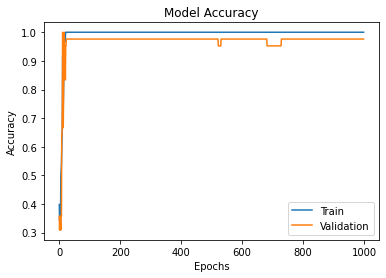

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
from keras import models
model.save('Final.h5')
model_CNN=models.load_model('Final.h5')

array([2])

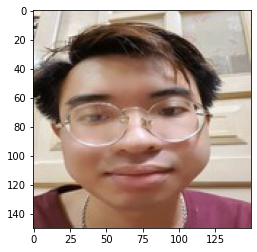

In [ ]:

from tensorflow.keras.utils import load_img , img_to_array

img=load_img('/content/drive/MyDrive/AI/Bai4/validation/hinh_1.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model_CNN.predict(img),axis=1)

array([0])

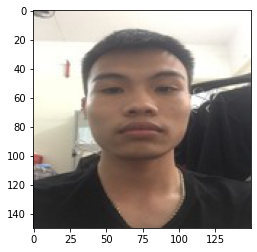

In [ ]:
from tensorflow.keras.utils import load_img , img_to_array

img=load_img('/content/drive/MyDrive/AI/Bai4/validation/dung.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model_CNN.predict(img),axis=1)

array([1])

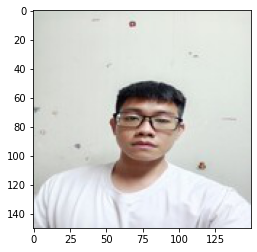

In [ ]:
img=load_img('/content/drive/MyDrive/AI/Bai4/validation/dat.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model_CNN.predict(img),axis=1)

array([0])

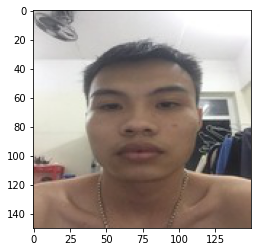

In [ ]:
img=load_img('/content/drive/MyDrive/AI/Bai4/validation/abc.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model_CNN.predict(img),axis=1)

array([0])

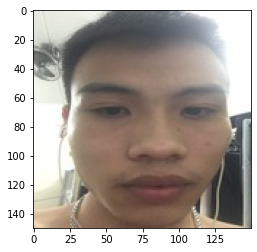

In [ ]:
img=load_img('/content/drive/MyDrive/AI/Bai4/validation/d.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model_CNN.predict(img),axis=1)